# AIP Group 15 
### Kanishck Tewatia
### 500203405

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_excel("Yeti_Analytics.xlsx")

In [3]:
df.shape

(20491, 2)

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df.tail()


,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [8]:
import matplotlib.pyplot as plt

In [9]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [10]:
groups = df.groupby('Rating')
print('Classification groups =>',len(df['Rating'].unique()))

Classification groups => 5


In [11]:
sum_by_rating = groups['Rating'].value_counts()
print('Number of reviews in each rating\n',sum_by_rating)

Number of reviews in each rating
 Rating  Rating
1       1         1421
2       2         1793
3       3         2184
4       4         6039
5       5         9054
Name: Rating, dtype: int64


In [12]:
type(sum_by_rating)

pandas.core.series.Series

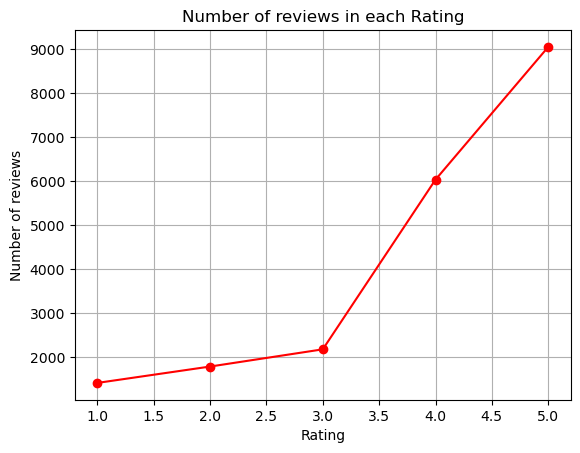

In [13]:
import matplotlib.pyplot as plt

score = [1,2,3,4,5]

plt.title('Number of reviews in each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.grid(True)

plt.plot(score, sum_by_rating, color='red', marker='o')

## Data Cleaning

In [14]:
for index,text in enumerate(df['Review'][55:60]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 nice place, lunatic 20000+ miles flying space days night kill seattle early trans-con flight nyc, night original plan needed hotel none prebooked.this place recommended just block excellent irish pub kells just happened ended in.just room left 220 tax.excellent friendly staff lovely decor big rooms im used nyc rabbit hutch big spacious views water free wi-fi just need ask reception access code, place spotless nicely decorated individual usual bland chain hotels sadly prevail.the area felt fine-in limited time safe near bars shops usual stuff, no drunken noise street either.it quiet comfortable slept well.normally like add pictures reviews length stay lack ca n't time- sorry return seattle list hotels use, try,  
Review 2:
 okay not amazing husband stayed weekend night, spent time trying great place stay seattle, read tripadvisor reviews saw listed tl 500 hotels, like pretty good bet fantastic place, great fine just not really amazing little boutique hotel expected reviews ra

Data looks cleaned and stop words are removed already. However, there are still some numbers that don't give much meaning to the review. So I will remove these numbers using regex from the review to make the model perform better.   

#### Removing numbers 

In [15]:
import re
regex:str = r'\w*\d\w*'
df['Review'] = df['Review'].apply(lambda x: re.sub(regex,'',x),)

In [16]:
for index,text in enumerate(df['Review'][55:60]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 nice place, lunatic + miles flying space days night kill seattle early trans-con flight nyc, night original plan needed hotel none prebooked.this place recommended just block excellent irish pub kells just happened ended in.just room left  tax.excellent friendly staff lovely decor big rooms im used nyc rabbit hutch big spacious views water free wi-fi just need ask reception access code, place spotless nicely decorated individual usual bland chain hotels sadly prevail.the area felt fine-in limited time safe near bars shops usual stuff, no drunken noise street either.it quiet comfortable slept well.normally like add pictures reviews length stay lack ca n't time- sorry return seattle list hotels use, try,  
Review 2:
 okay not amazing husband stayed weekend night, spent time trying great place stay seattle, read tripadvisor reviews saw listed tl  hotels, like pretty good bet fantastic place, great fine just not really amazing little boutique hotel expected reviews ratings, thou

Removing Special Characters

In [17]:
df['Review'] = df['Review'].apply(lambda x: re.sub('[!@#$%^&*(),.?":{}|<>+]','',x) )

In [18]:
for index,text in enumerate(df['Review'][55:60]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 nice place lunatic  miles flying space days night kill seattle early trans-con flight nyc night original plan needed hotel none prebookedthis place recommended just block excellent irish pub kells just happened ended injust room left  taxexcellent friendly staff lovely decor big rooms im used nyc rabbit hutch big spacious views water free wi-fi just need ask reception access code place spotless nicely decorated individual usual bland chain hotels sadly prevailthe area felt fine-in limited time safe near bars shops usual stuff no drunken noise street eitherit quiet comfortable slept wellnormally like add pictures reviews length stay lack ca n't time- sorry return seattle list hotels use try  
Review 2:
 okay not amazing husband stayed weekend night spent time trying great place stay seattle read tripadvisor reviews saw listed tl  hotels like pretty good bet fantastic place great fine just not really amazing little boutique hotel expected reviews ratings thought room nice not 

In [19]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not experience hotel monaco seattl...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5
...,...,...
20486,best kept secret time staying charm not -star...,5
20487,great location price view hotel great quick pl...,4
20488,ok just looks nice modern outside desk staff n...,2
20489,hotel theft ruined vacation hotel opened sept ...,1


## Analysis with VADER

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
Vader_Scores = df['Review'].apply(sia.polarity_scores)

In [23]:
Vader_Scores

0        {'neg': 0.072, 'neu': 0.64, 'pos': 0.288, 'com...
1        {'neg': 0.112, 'neu': 0.696, 'pos': 0.192, 'co...
2        {'neg': 0.085, 'neu': 0.686, 'pos': 0.229, 'co...
3        {'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...
4        {'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...
                               ...                        
20486    {'neg': 0.063, 'neu': 0.662, 'pos': 0.274, 'co...
20487    {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...
20488    {'neg': 0.131, 'neu': 0.724, 'pos': 0.145, 'co...
20489    {'neg': 0.152, 'neu': 0.667, 'pos': 0.181, 'co...
20490    {'neg': 0.193, 'neu': 0.668, 'pos': 0.14, 'com...
Name: Review, Length: 20491, dtype: object

In [24]:
compound_scores = Vader_Scores.apply(lambda x:x['compound'])

In [25]:
compound_scores

0        0.9747
1        0.9787
2        0.9889
3        0.9912
4        0.9797
          ...  
20486    0.9834
20487    0.9753
20488    0.2629
20489    0.9867
20490   -0.6071
Name: Review, Length: 20491, dtype: float64

In [26]:
df['Vader'] = compound_scores

In [27]:
df.head()

,Review,Rating,Vader
0,nice hotel expensive parking got good deal sta...,4,0.9747
1,ok nothing special charge diamond member hilto...,2,0.9787
2,nice rooms not experience hotel monaco seattl...,3,0.9889
3,unique great stay wonderful time hotel monaco ...,5,0.9912
4,great stay great stay went seahawk game awesom...,5,0.9797


In [28]:
from textblob import TextBlob


## Analysis with spacy

In [29]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [30]:
# Check the version
spacy.__version__

'3.6.0'

In [31]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x25221855f40>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x25221855d00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x252216dd3c0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x25221852a40>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x2522184c640>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x252216dd350>)]

In [32]:
# using spacy textblob
from spacytextblob.spacytextblob import SpacyTextBlob

In [33]:
# Add textblob to spacy pipeline
nlp.add_pipe('spacytextblob')

In [34]:
# Check of it was successful
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x25221855f40>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x25221855d00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x252216dd3c0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x25221852a40>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x2522184c640>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x252216dd350>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x2522fa88430>)]

In [35]:
from tqdm.notebook import tqdm
score = []
for text in tqdm(df['Review']):
    temp = nlp(text)
    score.append(temp._.polarity)
score

  0%|          | 0/20491 [00:00<?, ?it/s]

[0.20874404761904758,
 0.22720408163265307,
 0.29441964285714284,
 0.5048245614035087,
 0.38461538461538464,
 0.2430555555555556,
 0.36666065416065424,
 0.5629629629629629,
 0.3129464285714286,
 0.2863553113553114,
 0.24166666666666664,
 0.23451178451178448,
 0.2384178321678322,
 -0.09166666666666666,
 0.3050925925925926,
 0.006720430107526881,
 0.16041092745638202,
 0.3420987654320988,
 0.5,
 0.10575757575757576,
 0.17738095238095236,
 0.596875,
 0.38083333333333336,
 0.28802083333333334,
 0.259375,
 0.2518518518518519,
 0.46851851851851856,
 0.06562499999999999,
 0.3052838827838828,
 0.45698593073593075,
 0.3439102564102564,
 0.1893772893772894,
 0.12582417582417582,
 0.12638888888888888,
 0.2541666666666667,
 0.32475490196078427,
 0.30333333333333334,
 0.3077272727272727,
 0.12142857142857144,
 0.49375,
 -0.027838827838827834,
 0.33915343915343915,
 -0.22999999999999998,
 0.1741758241758242,
 -0.04305555555555555,
 0.1283900091136933,
 0.11168831168831167,
 0.19564102564102565,
 0.5

In [36]:
df['Spacy'] = score

In [37]:
df.head()

,Review,Rating,Vader,Spacy
0,nice hotel expensive parking got good deal sta...,4,0.9747,0.208744
1,ok nothing special charge diamond member hilto...,2,0.9787,0.227204
2,nice rooms not experience hotel monaco seattl...,3,0.9889,0.294420
3,unique great stay wonderful time hotel monaco ...,5,0.9912,0.504825
4,great stay great stay went seahawk game awesom...,5,0.9797,0.384615


In [38]:
df[df['Rating'] == 1]

,Review,Rating,Vader,Spacy
15,horrible customer service hotel stay february ...,1,0.8496,0.006720
32,noise airconditioner-a standard arranged stay ...,1,0.8716,0.125824
40,bad choice booked hotel hot wire called immedi...,1,-0.9249,-0.027839
65,hated inn terrible room-service horrible staff...,1,-0.9360,-0.633333
69,ace grunge lives does mold mildew tiny bed met...,1,0.3182,0.116667
...,...,...,...,...
20421,worst sleep hip tooooo hip nite club building ...,1,-0.9048,-0.242857
20460,june stay stayed hotel june /-// read reviews...,1,0.9108,0.191043
20465,not stay hotel brought group february worst ho...,1,-0.8750,-0.078571
20467,returning la concha nightmare surprising hotel...,1,-0.6057,0.025926
